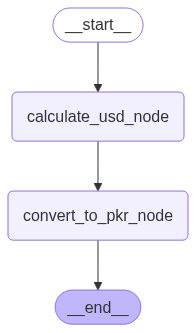

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from IPython.display import Image, display

class calculatePortfolio(TypedDict):
    amount_usd : float
    total_usd : float
    total_pkr : float


def calculate_total(state: calculatePortfolio)->calculatePortfolio:
    state['total_usd'] = state['amount_usd'] * 0.08
    return state

def convert_to_pkr(state: calculatePortfolio)->calculatePortfolio:
    state['total_pkr'] = state['total_usd'] * 280
    return state

builder = StateGraph(calculatePortfolio)
builder.add_node("calculate_total", calculate_total)
builder.add_node("convert_to_pkr_node", convert_to_pkr)

builder.add_edge(START, "calculate_total")
builder.add_edge("calculate_total", "convert_to_pkr_node")
builder.add_edge("convert_to_pkr_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

